In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
%matplotlib inline

In [4]:
# read the advertising data
df = pd.read_csv('Advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [8]:
x = df[['TV']]
y = df['Sales']

In [10]:
# train test split with 60% training set and 40% testing set
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.6, random_state=66)

In [12]:
#chosse k range from 1 to 70
k_min = 1
k_max = 70


In [14]:
#create list of integer values form k_min to k_max using linspace
k_list = np.linspace(k_min, k_max, num=70, dtype=int)
k_list

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70])

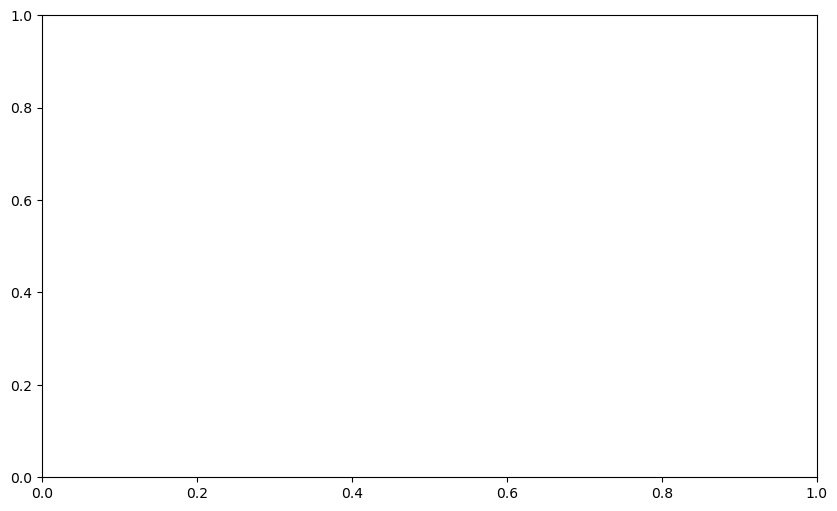

In [16]:
#model fit
#set up grid to plot data and predictions
fig, ax = plt.subplots(figsize=(10,6))

In [17]:
# creat a dictionary to store the k value against the MSE fit {k: MSE}
knn_dict = {}

In [18]:
#variable used for altering linewidth of values knn models
j = 0


In [23]:
for k_value in k_list:
    #create a nearesr neighbor model for the current k
    model = KNeighborsRegressor(n_neighbors=int(k_value))
    #fit the model on train data
    model.fit(x_train, y_train)
    #use the train model to predict on test data
    y_pred = model.predict(x_test)
    #calculate the MSE for the test predictions
    MSE = mean_squared_error(y_test, y_pred)
    # Store the MSE values of each k value in the dictionary
    knn_dict[k_value] = MSE

    # Helper code to plot the data and various kNN model predictions
    colors = ['grey','r', 'g']
    if k_value in [1, 10, 70]:
        xvals = np.linspace(x.min(), x.max(), 100)
        ypreds = model.predict(xvals)
        ax.plot(xvals, ypreds,'-',label = f'k = {int(k_value)}',linewidth=j+2,color = colors[j])
        j+=1

ax.legend(loc='lower right',fontsize=20)
ax.plot(x_train, y_train,'x',label='test',color='k')
ax.set_xlabel('TV budget in $1000',fontsize=20)
ax.set_ylabel('Sales in $1000',fontsize=20)
plt.tight_layout()

c:\Users\fahad\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


IndexError: list index out of range